# Tarea 1
## Nombre: Victor Alfaro Pino


##  P1: Enunciado
### Consideremos un sistema de numeros de punto flotante con s=1, base=2, largo de la mantisa m=3, $e_{min}$ = -1 y $e_{max}$=2 , es decir, tales que: $x_{float}$= 1.$d_1$ $d_2$ $\times$ $2^{e}$. Suponiendo que los numeros estan normalizados, es decir, tienen $d_0$=1, encuentre todos los numeros reales que se pueden representar en este sistema. Dibujelos sobre un eje real x.

<img src="tarea1.jpg" alt="descripción_de_la_imagen">

## P2 
### Primero importaremos las librerias necesarias para poder hacer lo que pide el enunciado. Posterior a esto, crearemos funciones auxiliares, como para calcular la serie , el error relativo y la cantidad de terminos necesarios para tener un error relativo $10^{-6}$

In [20]:
import math
import numpy as np
from scipy import special  #Esta libreria es la que contiene la función s_i que se usará para poder calcular el error relativo.

#Funcion para calcular la serie infinita
def serie(x, n): #n es el numero de terminos de la serie que se usarán.
    valor = 0
    for i in range(n):
        term = ((-1)**i * x**(2*i + 1)) / ((2*i + 1) * math.factorial(2*i + 1))
        valor+= term
    return valor


#Función que calcula el error relativo
def error_relativo(aprox, real):
    return abs(aprox-real) 

#Calcula la cantidad de terminos necesarios para tener un error relativo de 10^-6
def terminos(x, error=1e-6):
    real = special.sici(x)[0]  #Valor proporcionado por la libreria scipy evaluado en x
    n = 1 #Cantidad inicial de terminos que se necesitarian a priori para tener un error relativo
    while True:
        aprox = serie(x, n)
        if error_relativo(aprox,real) <= error:
            return n
        n += 1

x_vals= [0.1, 1.0, 10.0, 30.0, 100.0] #Valores que pide el enunciado

for value in x_vals:
    n = terminos(value)
    print(f"Para x = {value}, se necesitan {n} términos para un error relativo <= 1e-6")


Para x = 0.1, se necesitan 2 términos para un error relativo <= 1e-6
Para x = 1.0, se necesitan 4 términos para un error relativo <= 1e-6
Para x = 10.0, se necesitan 17 términos para un error relativo <= 1e-6


OverflowError: int too large to convert to float

### El programa anterior funciona solo para los primeros 3 valores de x, pero para x=30.0, el programa lanza "int too large to convert to float", esto ocurre porque la función math.factorial cuando se usan numeros grandes, el resultado ya no se puede representar como un float, en cambio si se usa 30, para un entero en python no hay muchos problemas siempre el valor resultante siga estando en el rango de los enteros. Por otro lado si se cambia el valor a 30 y a 100, en el valor 100 se quedará pegado indefinidamente. Pero si se cambia la libreria math por una que controle las precisiones como por ejemplo mpmath, se pueden tener los resultados: 
 

## Implementación con libreria mpmath:

In [18]:
import numpy as np
from scipy import special
from mpmath import mp

mp.dps = 50  # Precisión

# Funcion para calcular la serie infinita
def serie(x, n):
    valor = mp.mpf(0)  
    for i in range(n):
        term = ((-1)**i * mp.power(x, 2*i + 1)) / ((2*i + 1) * mp.factorial(2*i + 1))
        valor += term
    return valor

# Función que calcula el error relativo
def error_relativo(aprox, real):
    return abs(aprox - real)

# Calcula la cantidad de terminos necesarios para tener un error relativo de 10^-6
def terminos(x, error=1e-6):
    real = special.sici(x)[0]
    n = 1
    while True:
        aprox = serie(x, n)
        if error_relativo(aprox, real) <= error:
            return n
        n += 1

x_vals = [0.1, 1.0, 10.0, 30, 100.0]

for value in x_vals:
    n = terminos(value)
    print(f"Para x = {value}, se necesitan {n} términos para un error relativo <= 1e-6")


Para x = 0.1, se necesitan 2 términos para un error relativo <= 1e-6
Para x = 1.0, se necesitan 4 términos para un error relativo <= 1e-6
Para x = 10.0, se necesitan 17 términos para un error relativo <= 1e-6
Para x = 30, se necesitan 44 términos para un error relativo <= 1e-6
Para x = 100.0, se necesitan 138 términos para un error relativo <= 1e-6


### En cuanto a los resultados, se puede apreciar que a mayor valor de x, mayor es la cantidad de terminos que se necesitan para tener un error relativo menor o igual a $10^{-6}$, esto porque  teniendo en cuenta que el valor exacto se calcula como: 
$$
 \int_{0}^{x} sin(t)/t \, dt
$$
### Entonces a mayor valor de x, el valor real aumenta, y por lo tanto para mantenerse cerca del valor, la serie debe tomar mas valores. Esto tambien se cumple si es que el error relativo se calcula como |real-aprox| /real o |real-aprox|/aprox, el cual tambien es una definición que algunos libros ocupan.


# P3

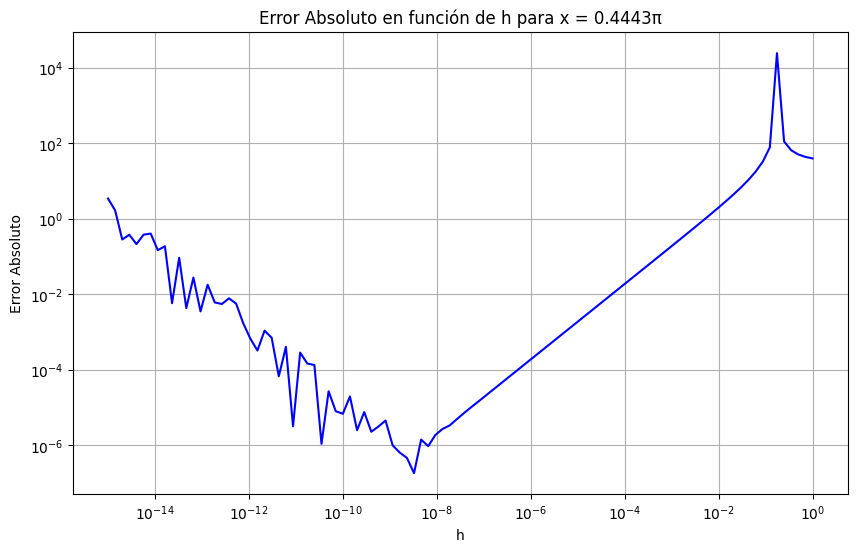

In [5]:
import matplotlib.pyplot as plt
import numpy as np
#Funcion a la que se le hace la aproximación de la derivada
def funcion(x):
    return np.tan(x)

#Aproximación de la derivada de la función 
def df(x,h):
    return ((funcion(x+h)-funcion(x))/h)

#Valor real de la derivada 
def fp_exacta(x):
    return (1/ np.cos(x))**2

x = 0.4443 * np.pi


h_values = np.logspace(-15, 0, 100) # Valores para h desde 10^-15 a 10^0 con 100 valores de diferencia. 

#Arreglo que contiene todos los errores para cada valor de h. 
errors = []
for h in h_values:
    aprox = df(x, h)
    real = fp_exacta(x)
    error = abs(aprox - real)
    errors.append(error)

plt.figure(figsize=(10, 6))
plt.loglog(h_values, errors, 'b-')
plt.xlabel('h')
plt.ylabel('Error Absoluto')
plt.title(f'Error Absoluto en función de h para x = 0.4443π')
plt.grid(True)
plt.show()

### Notemos que en un principio, el error va disminuyendo a medida que aumenta el h, pero a partir de aproximadamente $10^{-7}$ , el error comienza a crecer pracitcamnte de manera lineal hasta llegar a su peak en $h=10^{-1}$ aprox. y posteriormente disminuye para llegar a 1

# P4

<img src="p4.jpg" alt="descripción_de_la_imagen">